# Yu Hao Week4 Assignment4 yh3252 N11861972

## Step1

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import plot_decision_regions
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
iris = datasets.load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
score = svm.score(X_test_std, y_test)
one_hot = OneHotEncoder(categories='auto',sparse=False)
y_true = one_hot.fit_transform(y_test.reshape(-1,1))
y_pred = one_hot.fit_transform(svm.predict(X_test_std).reshape(-1,1))
logloss = log_loss(y_true, y_pred)

print('Accuracy is %f. logloss is %f'%(score, logloss))

Accuracy is 0.977778. logloss is 0.767528


## Step2 Run the SVM model (at least) four times using a different kernel each time

Accuracy is 0.977778. logloss is 0.767528


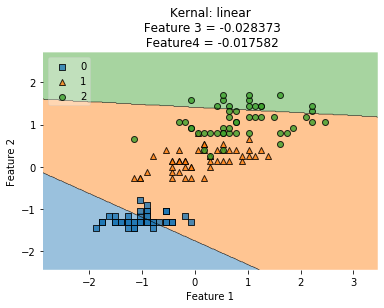

Accuracy is 0.888889. logloss is 3.837642


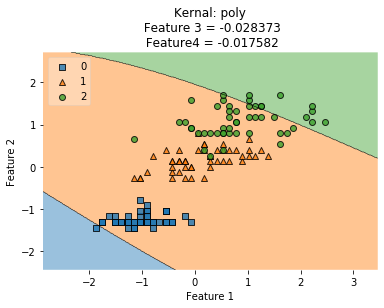

Accuracy is 0.977778. logloss is 0.767528


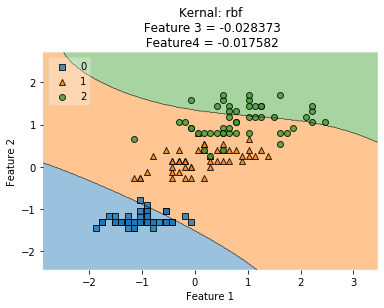

Accuracy is 0.888889. logloss is 3.837642


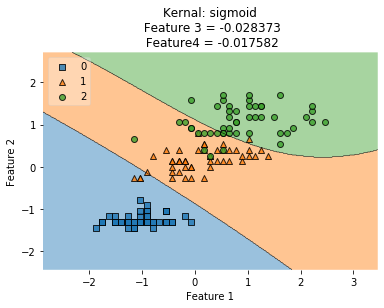

Kernal is linear. Accuracy is 0.977778. Logloss is 0.767528
Kernal is poly. Accuracy is 0.888889. Logloss is 3.837642
Kernal is rbf. Accuracy is 0.977778. Logloss is 0.767528
Kernal is sigmoid. Accuracy is 0.888889. Logloss is 3.837642


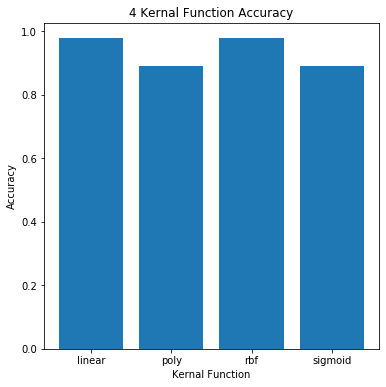

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 27 10:31:15 2019

@author: Sumail
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
dict = ['linear', 'poly', 'rbf', 'sigmoid']
dictout = []
dict1 = []
iris = datasets.load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
for i in range(len(dict)):
    svm = SVC(kernel=dict[i], C=1.0, random_state=1)
    svm.fit(X_train_std, y_train)
    score = svm.score(X_test_std, y_test)
    one_hot = OneHotEncoder(categories='auto',sparse=False)
    y_true = one_hot.fit_transform(y_test.reshape(-1,1))
    y_pred = one_hot.fit_transform(svm.predict(X_test_std).reshape(-1,1))
    logloss = log_loss(y_true, y_pred)
    fig, ax = plt.subplots()
    print('Accuracy is %f. logloss is %f'%(score, logloss))
    dict1.append(score)
    temp = X_combined_std.mean(axis = 0)
    value1 = temp[1]
    width1 = max(X_combined_std[:, 1].max(), abs(X_combined_std[:, 1].min()))
    value2 = temp[2]
    width2 = max(X_combined_std[:, 2].max(), abs(X_combined_std[:, 2].min()))
    plot_decision_regions(X_combined_std, y_combined, clf=svm, feature_index=[0,3],
                          filler_feature_values={1: value1, 2: value2},
                          filler_feature_ranges={1: width1, 2: width2},
                          legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Kernal: %s\n Feature 3 = %f\n Feature4 = %f'%(dict[i],value1,value2))
    
    # Adding axes annotations
    plt.show()
    
    dictout.append((score, logloss))
for i in range(len(dictout)):
    print('Kernal is %s. Accuracy is %f. Logloss is %f'%(dict[i], dictout[i][0], dictout[i][1]))
plt.figure(figsize= (6, 6))
plt.bar(range(len(dict)), dict1, tick_label=dict)
plt.title("4 Kernal Function Accuracy")
plt.xlabel("Kernal Function")
plt.ylabel("Accuracy")
plt.show()

## Step2.3 The diagram shows that both linear and rbf kernal have good performance compared  to poly and sigmoid. The diagram is not good using 4 features to rain the model and 2 features to plot of mlxtend. 

### Linear kernal's training process is fast but it can only process the linear separated data.

### Poly kernal can process linear inseparated data. It cannot process the data with too large power. It usually use in image processing.

### Rbf kernal can process both linear separated and inseparated data. However, the traing speed is slow because the training data will project into higher dimensional space which is expensive. It usually use in the data without prior knowledge

### Sigmoid kernal is actually a multi-layer perceptron and usually use in neural networks.

## Conclution: Linear kernal has less parameters and training fast but can only process the linear separated data. Rbf can process both linear separated and inseparated data but it has more parameters and training slow. Both linear and rbf kernal have good performance. We usually don't use poly kernal because it doesn't perform good.